# Project : Plan your trip with Kayak

In [1]:
import pandas as pd
pd.options.display.max_columns = 100

## 'Extract' : Collect the data

In [2]:
cities = ["Mont Saint Michel",
"St Malo",
"Bayeux",
"Le Havre",
"Rouen",
"Paris",
"Amiens",
"Lille",
"Strasbourg",
"Chateau du Haut Koenigsbourg",
"Colmar",
"Eguisheim",
"Besancon",
"Dijon",
"Annecy",
"Grenoble",
"Lyon",
"Gorges du Verdon",
"Bormes les Mimosas",
"Cassis",
"Marseille",
"Aix en Provence",
"Avignon",
"Uzes",
"Nimes",
"Aigues Mortes",
"Saintes Maries de la mer",
"Collioure",
"Carcassonne",
"Ariege",
"Toulouse",
"Montauban",
"Biarritz",
"Bayonne",
"La Rochelle"]

### Get weather data via an API :

In [3]:
import requests
import time

city = cities[0]
r = requests.get('https://nominatim.openstreetmap.org/search?format=json&city='+city)
city_json = r.json()[0] #We consider the first search result as the most relevant one

city_json

{'place_id': 156094736,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 211285890,
 'boundingbox': ['48.6349172', '48.637031', '-1.5133292', '-1.5094796'],
 'lat': '48.6359541',
 'lon': '-1.511459954959514',
 'display_name': 'Mont Saint-Michel, Le Mont-Saint-Michel, Avranches, Manche, Normandie, France métropolitaine, 50170, France',
 'class': 'place',
 'type': 'islet',
 'importance': 0.755436556781574}

In [4]:
name = city_json['display_name']
lat = city_json['lat']
lon = city_json['lon']
print(f"{name} : \n -- latitude : {lat} \n -- longitude : {lon}")

Mont Saint-Michel, Le Mont-Saint-Michel, Avranches, Manche, Normandie, France métropolitaine, 50170, France : 
 -- latitude : 48.6359541 
 -- longitude : -1.511459954959514


#### Generalization to the 35 cities list - Collecting the geoloc data and storing it into a list of json files

```python
import os
import logging

geolocs_info = []

for city in cities:
    r = requests.get('https://nominatim.openstreetmap.org/search?format=json&city='+city)
    city_json = r.json()[0]
    print(city)
    #logging.info(f"Storing data for {city_json['display_name']}...", end ='')
    geolocs_info.append(city_json)
    #logging.info("done.")
    time.sleep(1) #wait for 1sec between requests to respect Nominatim's Usage Policy
```

We have a problem with "Gorges du Verdon", probably because it's not litterally a city and therefore the API does not find anything in response to the request type 'city='. 
We will hence do a type 'q=' request which perform a more generalist search query: 

In [5]:
import os
import logging

geolocs_info = []

for city in cities:
    r = requests.get('https://nominatim.openstreetmap.org/search?format=json&q=France,'+city) #We add 'France' in the query to be more specific
    city_json = r.json()[0]
    city_json['city'] = city
    print(city, "...done")
    #logging.info(f"Storing data for {city_json['display_name']}...", end ='')
    geolocs_info.append(city_json)
    #logging.info("done.")
    time.sleep(1) #wait for 1sec between requests to respect Nominatim's Usage Policy
    

Mont Saint Michel ...done
St Malo ...done
Bayeux ...done
Le Havre ...done
Rouen ...done
Paris ...done
Amiens ...done
Lille ...done
Strasbourg ...done
Chateau du Haut Koenigsbourg ...done
Colmar ...done
Eguisheim ...done
Besancon ...done
Dijon ...done
Annecy ...done
Grenoble ...done
Lyon ...done
Gorges du Verdon ...done
Bormes les Mimosas ...done
Cassis ...done
Marseille ...done
Aix en Provence ...done
Avignon ...done
Uzes ...done
Nimes ...done
Aigues Mortes ...done
Saintes Maries de la mer ...done
Collioure ...done
Carcassonne ...done
Ariege ...done
Toulouse ...done
Montauban ...done
Biarritz ...done
Bayonne ...done
La Rochelle ...done


In [6]:
geolocs_info

[{'place_id': 156094680,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'way',
  'osm_id': 211285890,
  'boundingbox': ['48.6349172', '48.637031', '-1.5133292', '-1.5094796'],
  'lat': '48.6359541',
  'lon': '-1.511459954959514',
  'display_name': 'Mont Saint-Michel, Plateforme du Saut-\xadGaultier, Le Mont-Saint-Michel, Avranches, Manche, Normandie, France métropolitaine, 50170, France',
  'class': 'tourism',
  'type': 'attraction',
  'importance': 0.8654365567815739,
  'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_point_of_interest.p.20.png',
  'city': 'Mont Saint Michel'},
 {'place_id': 297756747,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 905534,
  'boundingbox': ['48.5979853', '48.6949736', '-2.0765246', '-1.9367259'],
  'lat': '48.649518',
  'lon': '-2.0260409',
  'display_name': 'Saint-Malo, Ille-et-Vilaine, Bretagne, France métro

Formatting the data into a Pandas dataframe : 

In [7]:
geolocs_df = pd.DataFrame(geolocs_info)
display(geolocs_df)

,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance,icon,city
0,156094680,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,211285890,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel
1,297756747,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,905534,"[48.5979853, 48.6949736, -2.0765246, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...,St Malo
2,297981358,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,145776,"[49.2608124, 49.2934736, -0.7275671, -0.6757378]",49.2764624,-0.7024738,"Bayeux, Calvados, Normandie, France métropolit...",boundary,administrative,0.792700,https://nominatim.openstreetmap.org/ui/mapicon...,Bayeux
3,298137491,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,104492,"[49.4516697, 49.5401463, 0.0667992, 0.1955556]",49.4938975,0.1079732,"Le Havre, Seine-Maritime, Normandie, France mé...",boundary,administrative,0.932333,https://nominatim.openstreetmap.org/ui/mapicon...,Le Havre
4,297518815,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,75628,"[49.4172001, 49.4652601, 1.0300648, 1.1521157]",49.4404591,1.0939658,"Rouen, Seine-Maritime, Normandie, France métro...",boundary,administrative,0.860073,https://nominatim.openstreetmap.org/ui/mapicon...,Rouen
5,297417241,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,7444,"[48.8155755, 48.902156, 2.224122, 2.4697602]",48.8588897,2.3200410217200766,"Paris, Île-de-France, France métropolitaine, F...",boundary,administrative,1.051710,https://nominatim.openstreetmap.org/ui/mapicon...,Paris
6,297534793,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,114347,"[49.846837, 49.9505487, 2.2235574, 2.3457767]",49.8941708,2.2956951,"Amiens, Somme, Hauts-de-France, France métropo...",boundary,administrative,0.844949,https://nominatim.openstreetmap.org/ui/mapicon...,Amiens
7,297472400,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,58404,"[50.6008264, 50.6612596, 2.9679677, 3.125725]",50.6365654,3.0635282,"Lille, Nord, Hauts-de-France, France métropoli...",boundary,administrative,0.873204,https://nominatim.openstreetmap.org/ui/mapicon...,Lille
8,297508568,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,71033,"[48.491861, 48.6461896, 7.6881371, 7.8360646]",48.584614,7.7507127,"Strasbourg, Bas-Rhin, Grand Est, France métrop...",boundary,administrative,0.894805,https://nominatim.openstreetmap.org/ui/mapicon...,Strasbourg
9,120791766,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,61044809,"[48.249302, 48.2496794, 7.3436964, 7.3449443]",48.249489800000006,7.34429620253195,"Château du Haut-Kœnigsbourg, Chemin fermé suit...",historic,castle,0.663955,https://nominatim.openstreetmap.org/ui/mapicon...,Chateau du Haut Koenigsbourg


In [8]:
geolocs_df = geolocs_df.drop(columns = ['licence','osm_type','osm_id'])

In [9]:
!pip install python-dotenv

  Using cached python_dotenv-0.20.0-py3-none-any.whl (17 kB)


In [10]:
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.getenv('api_key') #API_key obtained after free subscription
units = 'metric'
lat, lon = (geolocs_df[_][0] for _ in ['lat','lon'])
r = requests.get(f'https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&appid={api_key}&units={units}')
weather_json = r.json() #We consider the first search result as the most relevant one
weather_json['city']=cities[0]
weather_json

{'lat': 48.636,
 'lon': -1.5115,
 'timezone': 'Europe/Paris',
 'timezone_offset': 7200,
 'current': {'dt': 1659512451,
  'sunrise': 1659501751,
  'sunset': 1659555713,
  'temp': 17.39,
  'feels_like': 17.04,
  'pressure': 1016,
  'humidity': 71,
  'dew_point': 12.08,
  'uvi': 2.11,
  'clouds': 0,
  'visibility': 10000,
  'wind_speed': 2.72,
  'wind_deg': 337,
  'wind_gust': 2.57,
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}]},
 'minutely': [{'dt': 1659512460, 'precipitation': 0},
  {'dt': 1659512520, 'precipitation': 0},
  {'dt': 1659512580, 'precipitation': 0},
  {'dt': 1659512640, 'precipitation': 0},
  {'dt': 1659512700, 'precipitation': 0},
  {'dt': 1659512760, 'precipitation': 0},
  {'dt': 1659512820, 'precipitation': 0},
  {'dt': 1659512880, 'precipitation': 0},
  {'dt': 1659512940, 'precipitation': 0},
  {'dt': 1659513000, 'precipitation': 0},
  {'dt': 1659513060, 'precipitation': 0},
  {'dt': 1659513120, 'precipitation': 0},


In [11]:
weather_json.keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'minutely', 'hourly', 'daily', 'city'])

In [12]:
len(weather_json['daily'])

8

In [13]:
weather_json['daily'][0].keys()

dict_keys(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp', 'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed', 'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'uvi'])

The dates are in UNIX (=POSIX) format (number of seconds since 1st January 1970).
To convert it to datetime format we can use datetime.fromtimestamp method :

In [14]:
from datetime import datetime
date_example = datetime.fromtimestamp(weather_json['current']['dt'])
print(date_example)

2022-08-03 07:40:51


In [15]:
first_day_example = datetime.fromtimestamp(weather_json['daily'][0]['dt'])
last_day_example = datetime.fromtimestamp(weather_json['daily'][-1]['dt'])
print(first_day_example)
print(last_day_example)

2022-08-03 12:00:00
2022-08-10 12:00:00


We see that the 'daily' information is available from current day to the day D+7 included.  
Reminder : the time is set in UTC (Paris is UTC+1)

In [16]:
weather_0 = {key:weather_json[key] for key in ['city','daily']}
weather_0

{'city': 'Mont Saint Michel',
 'daily': [{'dt': 1659528000,
   'sunrise': 1659501751,
   'sunset': 1659555713,
   'moonrise': 1659523260,
   'moonset': 0,
   'moon_phase': 0.18,
   'temp': {'day': 24.29,
    'min': 16.62,
    'max': 27.79,
    'night': 18.57,
    'eve': 22,
    'morn': 17.61},
   'feels_like': {'day': 24.29, 'night': 19.02, 'eve': 22.24, 'morn': 17.46},
   'pressure': 1015,
   'humidity': 58,
   'dew_point': 15.51,
   'wind_speed': 7.28,
   'wind_deg': 324,
   'wind_gust': 9.09,
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': 1,
   'pop': 0,
   'uvi': 7.13},
  {'dt': 1659614400,
   'sunrise': 1659588232,
   'sunset': 1659642023,
   'moonrise': 1659614100,
   'moonset': 1659564660,
   'moon_phase': 0.21,
   'temp': {'day': 21.96,
    'min': 15.44,
    'max': 21.96,
    'night': 16.63,
    'eve': 18.71,
    'morn': 16.79},
   'feels_like': {'day': 21.6, 'night': 16.18, 'eve': 18.39, 'morn': 16.67},
   '

In [17]:
weather_0['daily'][0]['feels_like']

{'day': 24.29, 'night': 19.02, 'eve': 22.24, 'morn': 17.46}

In [18]:
weather_0_df = pd.DataFrame(weather_0)
weather_0_df

,city,daily
0,Mont Saint Michel,"{'dt': 1659528000, 'sunrise': 1659501751, 'sun..."
1,Mont Saint Michel,"{'dt': 1659614400, 'sunrise': 1659588232, 'sun..."
2,Mont Saint Michel,"{'dt': 1659700800, 'sunrise': 1659674714, 'sun..."
3,Mont Saint Michel,"{'dt': 1659787200, 'sunrise': 1659761196, 'sun..."
4,Mont Saint Michel,"{'dt': 1659873600, 'sunrise': 1659847678, 'sun..."
5,Mont Saint Michel,"{'dt': 1659960000, 'sunrise': 1659934161, 'sun..."
6,Mont Saint Michel,"{'dt': 1660046400, 'sunrise': 1660020645, 'sun..."
7,Mont Saint Michel,"{'dt': 1660132800, 'sunrise': 1660107128, 'sun..."


In [19]:
list(weather_0.keys())

['city', 'daily']

In [20]:
weather_0_df = pd.json_normalize(weather_0, record_path = ['daily'], meta = [key for key in weather_0.keys() if key != 'daily'])
weather_0_df

,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,uvi,temp.day,temp.min,temp.max,temp.night,temp.eve,temp.morn,feels_like.day,feels_like.night,feels_like.eve,feels_like.morn,city
0,1659528000,1659501751,1659555713,1659523260,0,0.18,1015,58,15.51,7.28,324,9.09,"[{'id': 800, 'main': 'Clear', 'description': '...",1,0,7.13,24.29,16.62,27.79,18.57,22.00,17.61,24.29,19.02,22.24,17.46,Mont Saint Michel
1,1659614400,1659588232,1659642023,1659614100,1659564660,0.21,1017,53,11.62,6.74,337,8.92,"[{'id': 801, 'main': 'Clouds', 'description': ...",17,0,7.21,21.96,15.44,21.96,16.63,18.71,16.79,21.60,16.18,18.39,16.67,Mont Saint Michel
2,1659700800,1659674714,1659728332,1659705180,1659652140,0.25,1022,39,9.27,7.31,16,9.91,"[{'id': 800, 'main': 'Clear', 'description': '...",2,0,6.81,24.48,12.09,24.99,14.08,21.78,14.02,24.00,13.14,21.01,13.54,Mont Saint Michel
3,1659787200,1659761196,1659814639,1659796440,1659739860,0.28,1022,21,2.62,7.97,33,12.72,"[{'id': 803, 'main': 'Clouds', 'description': ...",71,0,6.37,26.95,12.21,27.91,16.65,23.55,14.63,26.08,15.73,22.74,13.35,Mont Saint Michel
4,1659873600,1659847678,1659900944,1659887820,1659827940,0.32,1020,21,2.81,7.95,29,15.66,"[{'id': 800, 'main': 'Clear', 'description': '...",0,0,6.60,27.93,14.03,28.81,19.31,24.87,14.29,26.72,18.65,24.22,13.29,Mont Saint Michel
5,1659960000,1659934161,1659987248,1659978840,1659916680,0.36,1019,22,5.86,8.10,32,14.41,"[{'id': 800, 'main': 'Clear', 'description': '...",0,0,7.00,30.57,15.41,31.63,20.55,26.84,15.95,28.79,20.02,26.40,15.27,Mont Saint Michel
6,1660046400,1660020645,1660073550,1660069200,1660006260,0.40,1020,24,8.47,7.48,21,10.74,"[{'id': 800, 'main': 'Clear', 'description': '...",1,0,7.00,31.87,16.41,32.03,19.83,27.88,16.99,30.11,19.28,27.10,16.65,Mont Saint Michel
7,1660132800,1660107128,1660159851,1660158660,1660096860,0.44,1018,22,7.85,8.17,40,15.23,"[{'id': 803, 'main': 'Clouds', 'description': ...",62,0,7.00,33.08,16.94,34.47,24.31,29.94,17.98,31.18,23.79,28.56,17.45,Mont Saint Michel


In [21]:
len(pd.json_normalize(weather_0, record_path = ['daily'])['weather'][0])

1

In [22]:
weather_0_df['weather'].explode()

0    {'id': 800, 'main': 'Clear', 'description': 'c...
1    {'id': 801, 'main': 'Clouds', 'description': '...
2    {'id': 800, 'main': 'Clear', 'description': 'c...
3    {'id': 803, 'main': 'Clouds', 'description': '...
4    {'id': 800, 'main': 'Clear', 'description': 'c...
5    {'id': 800, 'main': 'Clear', 'description': 'c...
6    {'id': 800, 'main': 'Clear', 'description': 'c...
7    {'id': 803, 'main': 'Clouds', 'description': '...
Name: weather, dtype: object

In [23]:
pd.json_normalize(weather_0_df['weather'].explode())

,id,main,description,icon
0,800,Clear,clear sky,01d
1,801,Clouds,few clouds,02d
2,800,Clear,clear sky,01d
3,803,Clouds,broken clouds,04d
4,800,Clear,clear sky,01d
5,800,Clear,clear sky,01d
6,800,Clear,clear sky,01d
7,803,Clouds,broken clouds,04d


In [24]:
weather_0_df = pd.concat(
    [
        weather_0_df.drop(columns = ['weather']), 
        pd.json_normalize(weather_0_df['weather'].explode()).add_prefix('weather.')
    ], 
    axis = 1)

In [25]:
weather_0_df

,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,clouds,pop,uvi,temp.day,temp.min,temp.max,temp.night,temp.eve,temp.morn,feels_like.day,feels_like.night,feels_like.eve,feels_like.morn,city,weather.id,weather.main,weather.description,weather.icon
0,1659528000,1659501751,1659555713,1659523260,0,0.18,1015,58,15.51,7.28,324,9.09,1,0,7.13,24.29,16.62,27.79,18.57,22.00,17.61,24.29,19.02,22.24,17.46,Mont Saint Michel,800,Clear,clear sky,01d
1,1659614400,1659588232,1659642023,1659614100,1659564660,0.21,1017,53,11.62,6.74,337,8.92,17,0,7.21,21.96,15.44,21.96,16.63,18.71,16.79,21.60,16.18,18.39,16.67,Mont Saint Michel,801,Clouds,few clouds,02d
2,1659700800,1659674714,1659728332,1659705180,1659652140,0.25,1022,39,9.27,7.31,16,9.91,2,0,6.81,24.48,12.09,24.99,14.08,21.78,14.02,24.00,13.14,21.01,13.54,Mont Saint Michel,800,Clear,clear sky,01d
3,1659787200,1659761196,1659814639,1659796440,1659739860,0.28,1022,21,2.62,7.97,33,12.72,71,0,6.37,26.95,12.21,27.91,16.65,23.55,14.63,26.08,15.73,22.74,13.35,Mont Saint Michel,803,Clouds,broken clouds,04d
4,1659873600,1659847678,1659900944,1659887820,1659827940,0.32,1020,21,2.81,7.95,29,15.66,0,0,6.60,27.93,14.03,28.81,19.31,24.87,14.29,26.72,18.65,24.22,13.29,Mont Saint Michel,800,Clear,clear sky,01d
5,1659960000,1659934161,1659987248,1659978840,1659916680,0.36,1019,22,5.86,8.10,32,14.41,0,0,7.00,30.57,15.41,31.63,20.55,26.84,15.95,28.79,20.02,26.40,15.27,Mont Saint Michel,800,Clear,clear sky,01d
6,1660046400,1660020645,1660073550,1660069200,1660006260,0.40,1020,24,8.47,7.48,21,10.74,1,0,7.00,31.87,16.41,32.03,19.83,27.88,16.99,30.11,19.28,27.10,16.65,Mont Saint Michel,800,Clear,clear sky,01d
7,1660132800,1660107128,1660159851,1660158660,1660096860,0.44,1018,22,7.85,8.17,40,15.23,62,0,7.00,33.08,16.94,34.47,24.31,29.94,17.98,31.18,23.79,28.56,17.45,Mont Saint Michel,803,Clouds,broken clouds,04d


In [26]:
city_df_0 = geolocs_df.merge(weather_0_df, on = ['city'])
city_df_0

,place_id,boundingbox,lat,lon,display_name,class,type,importance,icon,city,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,clouds,pop,uvi,temp.day,temp.min,temp.max,temp.night,temp.eve,temp.morn,feels_like.day,feels_like.night,feels_like.eve,feels_like.morn,weather.id,weather.main,weather.description,weather.icon
0,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659528000,1659501751,1659555713,1659523260,0,0.18,1015,58,15.51,7.28,324,9.09,1,0,7.13,24.29,16.62,27.79,18.57,22.00,17.61,24.29,19.02,22.24,17.46,800,Clear,clear sky,01d
1,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659614400,1659588232,1659642023,1659614100,1659564660,0.21,1017,53,11.62,6.74,337,8.92,17,0,7.21,21.96,15.44,21.96,16.63,18.71,16.79,21.60,16.18,18.39,16.67,801,Clouds,few clouds,02d
2,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659700800,1659674714,1659728332,1659705180,1659652140,0.25,1022,39,9.27,7.31,16,9.91,2,0,6.81,24.48,12.09,24.99,14.08,21.78,14.02,24.00,13.14,21.01,13.54,800,Clear,clear sky,01d
3,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659787200,1659761196,1659814639,1659796440,1659739860,0.28,1022,21,2.62,7.97,33,12.72,71,0,6.37,26.95,12.21,27.91,16.65,23.55,14.63,26.08,15.73,22.74,13.35,803,Clouds,broken clouds,04d
4,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659873600,1659847678,1659900944,1659887820,1659827940,0.32,1020,21,2.81,7.95,29,15.66,0,0,6.60,27.93,14.03,28.81,19.31,24.87,14.29,26.72,18.65,24.22,13.29,800,Clear,clear sky,01d
5,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659960000,1659934161,1659987248,1659978840,1659916680,0.36,1019,22,5.86,8.10,32,14.41,0,0,7.00,30.57,15.41,31.63,20.55,26.84,15.95,28.79,20.02,26.40,15.27,800,Clear,clear sky,01d
6,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1660046400,1660020645,1660073550,1660069200,1660006260,0.40,1020,24,8.47,7.48,21,10.74,1,0,7.00,31.87,16.41,32.03,19.83,27.88,16.99,30.11,19.28,27.10,16.65,800,Clear,clear sky,01d
7,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1660132800,1660107128,1660159851,1660158660,1660096860,0.44,1018,22,7.85,8.17,40,15.23,62,0,7.00,33.08,16.94,34.47,24.31,29.94,17.98,31.18,23.79,28.56,17.45,803,Clouds,broken clouds,04d


### Generalization to the 35 cities - storing all localization and weather data in a single dataframe

In [27]:
city_dataframes = []
for i, city  in enumerate(cities):    
    lat, lon = (geolocs_df[_][i] for _ in ['lat','lon'])
    r = requests.get(f'https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&appid={api_key}&units={units}')
    weather_json = r.json() #We consider the first search result as the most relevant one
    weather_json['city']= city
    weather_json = {key:weather_json[key] for key in ['city','daily']}
    
    weather_df = pd.json_normalize(weather_json, record_path = ['daily'], meta = [key for key in weather_0.keys() if key != 'daily'])
    weather_df = pd.concat(
    [
        weather_df.drop(columns = ['weather']), 
        pd.json_normalize(weather_df['weather'].explode()).add_prefix('weather.')
    ], 
    axis = 1)
    
    city_df = geolocs_df.merge(weather_df, on = ['city'])
    
    city_dataframes.append(city_df)
    
city_dataframes[1]

,place_id,boundingbox,lat,lon,display_name,class,type,importance,icon,city,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,clouds,pop,uvi,temp.day,temp.min,temp.max,temp.night,temp.eve,temp.morn,feels_like.day,feels_like.night,feels_like.eve,feels_like.morn,weather.id,weather.main,weather.description,weather.icon
0,297756747,"[48.5979853, 48.6949736, -2.0765246, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...,St Malo,1659528000,1659501872,1659555839,1659523380,0,0.18,1015,72,16.86,6.15,333,8.63,30,0,7.12,22.14,17.29,23.98,18.74,20.87,17.77,22.29,19.10,21.23,18.14,802,Clouds,scattered clouds,03d
1,297756747,"[48.5979853, 48.6949736, -2.0765246, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...,St Malo,1659614400,1659588353,1659642149,1659614220,1659564780,0.21,1018,63,12.47,7.32,331,8.92,21,0,7.08,20.09,16.99,20.09,17.65,18.25,17.68,19.80,17.19,17.96,17.57,801,Clouds,few clouds,02d
2,297756747,"[48.5979853, 48.6949736, -2.0765246, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...,St Malo,1659700800,1659674835,1659728458,1659705300,1659652260,0.25,1023,54,10.79,9.88,354,10.75,3,0,6.78,20.80,16.11,20.80,17.57,19.31,16.86,20.35,16.92,18.76,16.43,800,Clear,clear sky,01d
3,297756747,"[48.5979853, 48.6949736, -2.0765246, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...,St Malo,1659787200,1659761317,1659814764,1659796560,1659739980,0.28,1023,40,7.62,10.48,22,12.64,60,0,6.55,23.61,16.03,23.61,18.40,21.79,16.25,23.07,17.84,21.20,15.37,803,Clouds,broken clouds,04d
4,297756747,"[48.5979853, 48.6949736, -2.0765246, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...,St Malo,1659873600,1659847800,1659901070,1659887940,1659828060,0.32,1021,42,8.51,10.32,19,13.99,0,0,6.61,23.80,16.42,23.93,19.23,22.72,16.83,23.33,18.88,22.30,16.24,800,Clear,clear sky,01d
5,297756747,"[48.5979853, 48.6949736, -2.0765246, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...,St Malo,1659960000,1659934283,1659987373,1659979020,1659916800,0.36,1020,46,10.85,9.68,16,13.89,0,0,7.00,25.42,16.88,25.51,20.27,23.93,17.41,25.22,20.05,23.66,17.09,800,Clear,clear sky,01d
6,297756747,"[48.5979853, 48.6949736, -2.0765246, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...,St Malo,1660046400,1660020766,1660073675,1660069320,1660006380,0.40,1021,53,13.85,8.34,13,10.85,2,0,7.00,25.55,17.66,26.11,20.69,24.71,18.20,25.54,20.49,24.54,18.24,800,Clear,clear sky,01d
7,297756747,"[48.5979853, 48.6949736, -2.0765246, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...,St Malo,1660132800,1660107249,1660159976,1660158780,1660096980,0.44,1019,48,13.08,8.73,13,12.98,58,0,7.00,26.73,18.13,27.45,21.58,26.10,18.67,27.06,21.39,26.10,18.63,803,Clouds,broken clouds,04d


In [28]:
cities_df = pd.concat(city_dataframes, axis = 0)
cities_df

,place_id,boundingbox,lat,lon,display_name,class,type,importance,icon,city,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,clouds,pop,uvi,temp.day,temp.min,temp.max,temp.night,temp.eve,temp.morn,feels_like.day,feels_like.night,feels_like.eve,feels_like.morn,weather.id,weather.main,weather.description,weather.icon,rain
0,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659528000,1659501751,1659555713,1659523260,0,0.18,1015,58,15.51,7.28,324,9.09,1,0.00,7.13,24.29,16.62,27.79,18.57,22.00,17.61,24.29,19.02,22.24,17.46,800,Clear,clear sky,01d,NaN
1,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659614400,1659588232,1659642023,1659614100,1659564660,0.21,1017,53,11.62,6.74,337,8.92,17,0.00,7.21,21.96,15.44,21.96,16.63,18.71,16.79,21.60,16.18,18.39,16.67,801,Clouds,few clouds,02d,NaN
2,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659700800,1659674714,1659728332,1659705180,1659652140,0.25,1022,39,9.27,7.31,16,9.91,2,0.00,6.81,24.48,12.09,24.99,14.08,21.78,14.02,24.00,13.14,21.01,13.54,800,Clear,clear sky,01d,NaN
3,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659787200,1659761196,1659814639,1659796440,1659739860,0.28,1022,21,2.62,7.97,33,12.72,71,0.00,6.37,26.95,12.21,27.91,16.65,23.55,14.63,26.08,15.73,22.74,13.35,803,Clouds,broken clouds,04d,NaN
4,156094680,"[48.6349172, 48.637031, -1.5133292, -1.5094796]",48.6359541,-1.511459954959514,"Mont Saint-Michel, Plateforme du Saut-­Gaultie...",tourism,attraction,0.865437,https://nominatim.openstreetmap.org/ui/mapicon...,Mont Saint Michel,1659873600,1659847678,1659900944,1659887820,1659827940,0.32,1020,21,2.81,7.95,29,15.66,0,0.00,6.60,27.93,14.03,28.81,19.31,24.87,14.29,26.72,18.65,24.22,13.29,800,Clear,clear sky,01d,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,297653650,"[46.1331804, 46.1908971, -1.2419231, -1.111097]",46.1591126,-1.1520434,"La Rochelle, Charente-Maritime, Nouvelle-Aquit...",boundary,administrative,0.911484,https://nominatim.openstreetmap.org/ui/mapicon...,La Rochelle,1659787200,1659761541,1659814121,1659795780,1659740220,0.28,1017,36,11.57,9.14,30,15.33,90,0.00,7.02,28.97,19.87,30.18,25.16,29.01,19.87,28.25,24.67,27.94,19.32,804,Clouds,overcast clouds,04d,NaN
4,297653650,"[46.1331804, 46.1908971, -1.2419231, -1.111097]",46.1591126,-1.1520434,"La Rochelle, Charente-Maritime, Nouvelle-Aquit...",boundary,administrative,0.911484,https://nominatim.openstreetmap.org/ui/mapicon...,La Rochelle,1659873600,1659848015,1659900434,1659886980,1659828480,0.32,1015,36,10.74,8.09,32,13.36,100,0.38,7.17,28.10,20.05,29.83,26.41,29.29,20.05,27.49,26.41,28.91,19.16,500,Rain,light rain,10d,0.28
5,297653650,"[46.1331804, 46.1908971, -1.2419231, -1.111097]",46.1591126,-1.1520434,"La Rochelle, Charente-Maritime, Nouvelle-Aquit...",boundary,administrative,0.911484,https://nominatim.openstreetmap.org/ui/mapicon...,La Rochelle,1659960000,1659934490,1659986747,1659977940,1659917340,0.36,1015,46,12.40,8.31,53,14.80,99,0.39,8.00,26.74,20.66,26.74,22.60,22.54,20.66,26.97,22.64,22.65,19.85,500,Rain,light rain,10d,0.58
6,297653650,"[46.1331804, 46.1908971, -1.2419231, -1.1

### Selecting criterias and saving csv file

In [29]:
import numpy as np
criterias = {
    'feels_like.day': np.mean,
    'pop': np.mean
}

In [30]:
cities_df_grouped = cities_df.groupby('city').agg(criterias)
ideal_temperature = 30
cities_df_grouped['delta_with_ideal_temp'] = cities_df_grouped['feels_like.day'].apply(lambda temp : round(abs(temp - ideal_temperature)))
cities_df_grouped['pop_%'] = cities_df_grouped['pop']*100 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_criterias = pd.DataFrame(sc.fit_transform(cities_df_grouped.iloc[:,2:]), index = cities_df_grouped.index, columns = ['delta_temp_scaled', 'pop_scaled']) 
scaled_criterias['score_to_minimize'] = scaled_criterias['delta_temp_scaled'] + scaled_criterias['pop_scaled']

cities_df_grouped = pd.concat([cities_df_grouped, scaled_criterias], axis = 1)
cities_df_grouped = cities_df_grouped.sort_values(['score_to_minimize'], ascending = True).reset_index(drop = False)
cities_df_grouped.insert(0, 'id', cities_df_grouped.index)
cities_df_grouped['rank'] = cities_df_grouped.index + 1
cities_df_grouped

,id,city,feels_like.day,pop,delta_with_ideal_temp,pop_%,delta_temp_scaled,pop_scaled,score_to_minimize,rank
0,0,Eguisheim,30.43625,0.12375,0,12.375,-1.288998,-0.568045,-1.857044,1
1,1,Besancon,30.28750,0.17500,0,17.500,-1.288998,-0.291162,-1.580160,2
2,2,Strasbourg,30.63875,0.08375,1,8.375,-0.793230,-0.784149,-1.577379,3
3,3,Dijon,31.17000,0.08875,1,8.875,-0.793230,-0.757136,-1.550366,4
4,4,Cassis,30.25500,0.19250,0,19.250,-1.288998,-0.196616,-1.485615,5
5,5,Marseille,30.36500,0.19375,0,19.375,-1.288998,-0.189863,-1.478861,6
6,6,Rouen,28.34375,0.01125,2,1.125,-0.297461,-1.175838,-1.473299,7
7,7,Colmar,30.60375,0.12000,1,12.000,-0.793230,-0.588305,-1.381535,8
8,8,Annecy,30.20000,0.22375,0,22.375,-1.288998,-0.027785,-1.316783,9
9,9,Aigues Mortes,30.45250,0.24375,0,24.375,-1.288998,0.080267,-1.208731,10


In [31]:
cities_df_grouped.to_csv('weather_data.csv', index = False)

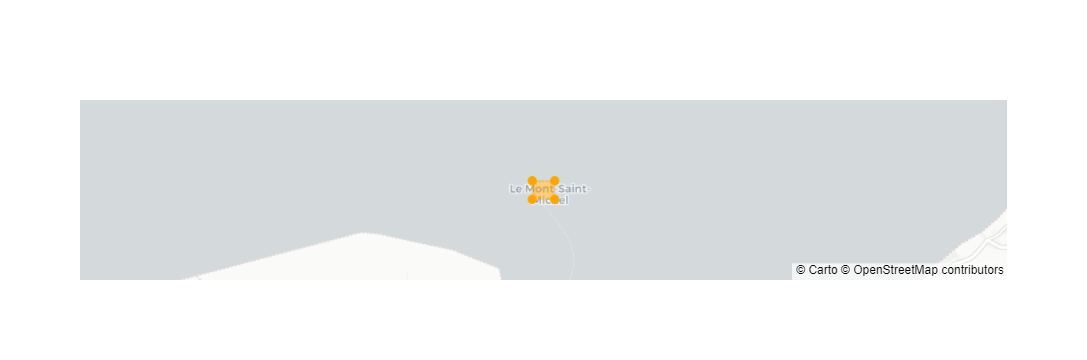

In [69]:
# Testing bounding box for the first city example :
import plotly.graph_objects as go

bounding_box_example = [48.6349172, 48.637031, -1.5133292, -1.5094796]
bounding_box_lon = [x for x in list(reversed(bounding_box_example[2:])) for _ in range(2)]
bounding_box_lat = bounding_box_example[:2] + list(reversed(bounding_box_example[:2])) 

fig = go.Figure(go.Scattermapbox(
    fill = "toself",
    lon = bounding_box_lon, lat = bounding_box_lat,
    marker = { 'size': 10, 'color': "orange" }))

fig.update_layout(
    mapbox = {
        'style': "carto-positron",
        'center': {'lon': np.mean(bounding_box_example[2:]), 'lat': np.mean(bounding_box_example[:2])},
        'zoom': 12},
    showlegend = False)

fig.show()